In [8]:
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense , Dropout , GlobalAveragePooling2D


In [ ]:
#vgg 16 model
classifier_vgg16 = VGG16(input_shape=(64,64,3),include_top=False,weights='imagenet')
classifier_vgg16.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#not train top layers
for layer in classifier_vgg16.layers:
    layer.trainable = False

In [ ]:
#adding extra layers for our class/images
main_model = classifier_vgg16.output
main_model = GlobalAveragePooling2D()(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(1024,activation='relu')(main_model)
main_model = Dense(512,activation='relu')(main_model)
main_model = Dropout(0.5)(main_model)
main_model = Dense(18,activation='softmax')(main_model)

In [12]:
#compiling
model = Model(inputs = classifier_vgg16.input , outputs = main_model)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Fitting the CNN to the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [ ]:
#makes sure you provide the same target as initialised for the image size
training_set = train_datagen.flow_from_directory(r'E:\DL project\Transfer learning\dataset\train',
                                                 target_size=(64,64),
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(r'E:\DL project\Transfer learning\dataset\val',
                                            target_size=(64,64),
                                            class_mode='categorical',
                                            shuffle=False)

Found 62 images belonging to 18 classes.
Found 18 images belonging to 18 classes.


In [15]:
#fit the model

print(training_set.class_indices)
print(test_set.class_indices)

history = model.fit(training_set,
                            validation_data=test_set,
                            epochs=5)

{'U20CS058': 0, 'U21CS006': 1, 'U21CS010': 2, 'U21CS025': 3, 'U21CS026': 4, 'U21CS034': 5, 'U21CS042': 6, 'U21CS046': 7, 'U21CS050': 8, 'U21CS054': 9, 'U21CS061': 10, 'U21CS075': 11, 'U21CS077': 12, 'U21CS100': 13, 'U21CS110': 14, 'U21CS129': 15, 'U21cs037': 16, 'U21cs83': 17}
{'U20CS058': 0, 'U21CS006': 1, 'U21CS010': 2, 'U21CS025': 3, 'U21CS026': 4, 'U21CS034': 5, 'U21CS042': 6, 'U21CS046': 7, 'U21CS050': 8, 'U21CS054': 9, 'U21CS061': 10, 'U21CS075': 11, 'U21CS077': 12, 'U21CS100': 13, 'U21CS110': 14, 'U21CS129': 15, 'U21cs037': 16, 'U21cs83': 17}


c:\Users\zains\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17s/step - accuracy: 0.1882 - loss: 2.8889 

c:\Users\zains\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 49s 28s/step - accuracy: 0.1953 - loss: 2.8890 - val_accuracy: 0.0556 - val_loss: 2.8905
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 46s 26s/step - accuracy: 0.2550 - loss: 2.8877 - val_accuracy: 0.0556 - val_loss: 2.8905
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 24s/step - accuracy: 0.2280 - loss: 2.8858 - val_accuracy: 0.0556 - val_loss: 2.8904
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 24s/step - accuracy: 0.2280 - loss: 2.8850 - val_accuracy: 0.0556 - val_loss: 2.8903
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 25s/step - accuracy: 0.2613 - loss: 2.8818 - val_accuracy: 0.0556 - val_loss: 2.8903


In [16]:
model.save("E:/projects/face recognition transfer learning/face_recog_vgg_new.h5")

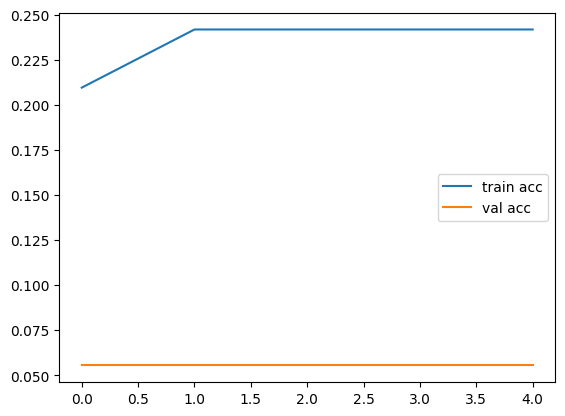

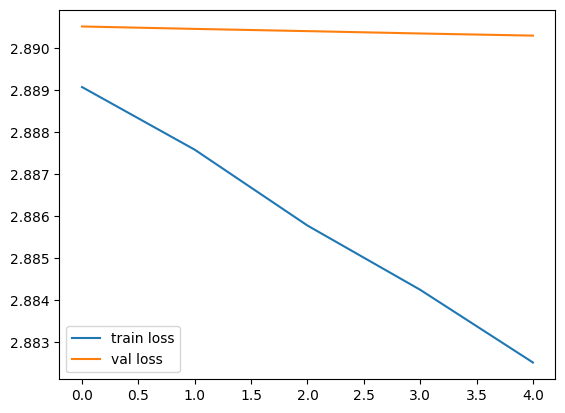

In [17]:
#PLOTTING accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'] , label = 'train acc')
plt.plot(history.history['val_accuracy'] , label = 'val acc')
plt.legend()
plt.show()

#PLOTTING loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , label = 'train loss')
plt.plot(history.history['val_loss'] , label = 'val loss')
plt.legend()
plt.show()

In [18]:
from keras.models import load_model
classifier = load_model('E:/projects/face recognition transfer learning/face_recog_vgg_new.h5')

In [19]:
from PIL import Image 
import base64
from io import BytesIO
import json
import random
import cv2
import numpy as np

In [20]:
from mtcnn import MTCNN
import cv2
import numpy as np
import os
from tensorflow.keras.models import load_model
from PIL import Image

# Load the trained face recognition model
classifier = load_model('E:/projects/face recognition transfer learning/face_recog_vgg_new.h5')

# Initialize the MTCNN detector
detector = MTCNN()

def load_labels(dataset_path):
    """
    Dynamically loads class labels from folder names in the dataset/train directory.
    """
    train_path = os.path.join(dataset_path, 'train')
    labels = sorted(os.listdir(train_path))  # Sorting ensures consistent order
    return labels

def face_extractor(img):
    """
    Detect faces using MTCNN and return a list of cropped faces and bounding boxes.
    """
    results = detector.detect_faces(img)
    
    if not results:
        return []
    
    cropped_faces = []
    for res in results:
        x, y, w, h = res['box']
        cropped_face = img[y:y + h, x:x + w]
        cropped_faces.append((cropped_face, (x, y, w, h)))
    
    return cropped_faces

def process_image(image_path):
    """
    Process a single image, detect faces using MTCNN, and classify them.
    """
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert to RGB (OpenCV loads images in BGR by default)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Extract faces
    faces = face_extractor(img_rgb)
    
    if not faces:
        print("No faces detected in the image.")
        return
    
    for face, (x, y, w, h) in faces:
        # Preprocess the face for the classifier
        face_resized = cv2.resize(face, (224, 224))
        face_array = np.array(face_resized)
        face_array = face_array / 255.0  # Normalize pixel values
        face_array = np.expand_dims(face_array, axis=0)  # Add batch dimension
        
        # Predict using the classifier
        pred = classifier.predict(face_array)
        
        # Default to "Unknown"
        name = "Unknown"
        
        # Map predictions to names if the confidence exceeds a threshold
        for i, label in enumerate(labels):
            if pred[0][i] > 0.4:  # Threshold for confidence
                name = label
                break
        
        # Draw bounding box and name on the original image
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
        cv2.putText(img, name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    
    # Save the annotated image with bounding boxes and labels
    output_dir = r"E:\DL project\Transfer learning"
    os.makedirs(output_dir, exist_ok=True)
    annotated_test_img_path = os.path.join(output_dir, "annotated_test_image.jpg")
    cv2.imwrite(annotated_test_img_path, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
    print(f"Annotated image saved to: {annotated_test_img_path}")

dataset_path = r'E:\DL project\Transfer learning\dataset'
labels = load_labels(dataset_path)

# Provide the path to the image file
image_path = r'dl.jpg'  # Update with the actual image path
process_image(image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 